## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.__version__
# tf.config.set_visible_devices([], 'GPU')
print(tf.config.list_physical_devices('GPU'))

c:\ProgramData\miniconda3\envs\vision\lib\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Loading the pretrained CNN (VGG19)

In [2]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

In [3]:
network.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [4]:
len(network.layers)

22

## Loading and Preprocessing the images

In [5]:
content_image = tf.keras.preprocessing.image.load_img("D:/COMPUTER VISION MASTERCLASS/repo/Images/chaves.jpeg")

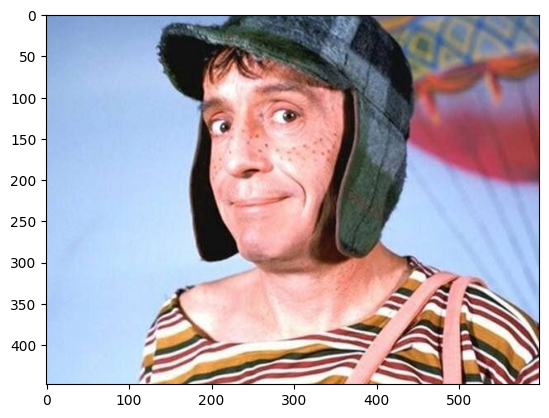

In [6]:
plt.imshow(content_image)

In [7]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [9]:
content_image = tf.image.resize(content_image, [224, 224])

In [10]:
content_image.shape

TensorShape([224, 224, 3])

In [11]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [12]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (224, 224, 3), 0.0, 255.0)

In [13]:
content_image = content_image / 255

In [14]:
content_image.min(), content_image.max()

(0.0, 1.0)

In [15]:
content_image

array([[[0.48235294, 0.60784316, 0.80784315],
        [0.48235294, 0.60784316, 0.80784315],
        [0.48235294, 0.60784316, 0.80784315],
        ...,
        [0.4106608 , 0.47459692, 0.54450256],
        [0.38431373, 0.4627451 , 0.5568628 ],
        [0.38431373, 0.4627451 , 0.5568628 ]],

       [[0.4882353 , 0.6137255 , 0.8137255 ],
        [0.4882353 , 0.6137255 , 0.8137255 ],
        [0.4882353 , 0.6137255 , 0.8137255 ],
        ...,
        [0.40213504, 0.4644517 , 0.54637617],
        [0.38627452, 0.47058824, 0.57058823],
        [0.38627452, 0.47058824, 0.57058823]],

       [[0.49607843, 0.6215686 , 0.8215686 ],
        [0.49607843, 0.6215686 , 0.8215686 ],
        [0.49607843, 0.6215686 , 0.8215686 ],
        ...,
        [0.40699342, 0.467008  , 0.5636819 ],
        [0.38235295, 0.4745098 , 0.5901961 ],
        [0.38235295, 0.4745098 , 0.5901961 ]],

       ...,

       [[0.71993166, 0.85326505, 0.9983631 ],
        [0.71665794, 0.84999126, 0.9950893 ],
        [0.7117647 , 0

In [16]:
content_image = content_image[tf.newaxis, :]

In [17]:
content_image.shape

(1, 224, 224, 3)

## Style Image

In [18]:
style_image = tf.keras.preprocessing.image.load_img("D:/COMPUTER VISION MASTERCLASS/repo/Images/vangogh.jpg")

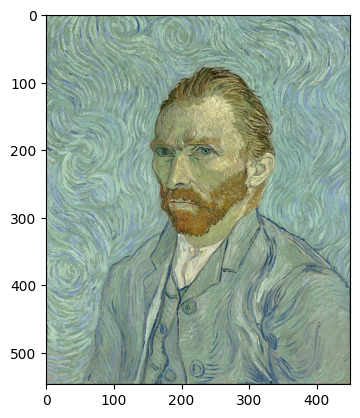

In [19]:
plt.imshow(style_image)

In [20]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)

In [21]:
style_image = tf.image.resize(style_image, [224, 224])

In [22]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)

In [23]:
type(style_image), style_image.shape, style_image.min(), style_image.max()

(numpy.ndarray, (224, 224, 3), 0.07769634, 247.54483)

In [24]:
style_image = style_image / 255

In [25]:
style_image

array([[[0.53880274, 0.64860666, 0.56233215],
        [0.5357892 , 0.64559317, 0.55931866],
        [0.6664628 , 0.7723451 , 0.6978353 ],
        ...,
        [0.5291076 , 0.6153821 , 0.6626161 ],
        [0.5584733 , 0.6506827 , 0.6822654 ],
        [0.36471376, 0.4451235 , 0.45300183]],

       [[0.51091945, 0.62008435, 0.5357268 ],
        [0.64496374, 0.7541287 , 0.6697712 ],
        [0.64159507, 0.7494819 , 0.66384643],
        ...,
        [0.5590934 , 0.655128  , 0.70154786],
        [0.5872766 , 0.681092  , 0.71265763],
        [0.32007146, 0.39726   , 0.4165193 ]],

       [[0.54701227, 0.6481502 , 0.5736404 ],
        [0.635191  , 0.73632896, 0.66181916],
        [0.6407647 , 0.7388039 , 0.656451  ],
        ...,
        [0.573835  , 0.6820895 , 0.72522676],
        [0.54556876, 0.6476983 , 0.68507457],
        [0.3509202 , 0.4203469 , 0.45256352]],

       ...,

       [[0.5769477 , 0.6240204 , 0.56254476],
        [0.6087189 , 0.66055834, 0.5892744 ],
        [0.59075314, 0

In [26]:
style_image = style_image[tf.newaxis, :]
style_image.shape

(1, 224, 224, 3)

## Building the Neural Network

In [27]:
content_layers = ["block4_conv2"]
style_layers = ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1", "block5_conv1"]

In [28]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)
print(num_content_layers, num_style_layers)

1 5


In [29]:
[network.get_layer(name).output for name in style_layers]

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [30]:
network.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [31]:
def vgg_layers(layer_names):
    vgg = tf.keras.applications.VGG19(include_top='false', weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]
    network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)

    return network

In [32]:
style_extractor = vgg_layers(style_layers)

In [33]:
style_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
style_extractor.outputs

[<KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 28, 28, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, 14, 14, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [35]:
style_extractor.inputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>]

In [36]:
style_outputs = style_extractor(style_image)

In [37]:
len(style_outputs)

5

In [38]:
style_outputs[0]

<tf.Tensor: shape=(1, 224, 224, 64), dtype=float32, numpy=
array([[[[0.        , 0.1832852 , 0.12825534, ..., 0.4549486 ,
          0.5531473 , 0.20607801],
         [0.        , 0.28946105, 0.41134468, ..., 0.0397104 ,
          1.4140208 , 0.9983123 ],
         [0.        , 0.34138632, 0.5312497 , ..., 0.08074176,
          1.7394527 , 1.3846276 ],
         ...,
         [0.        , 0.23186648, 0.40387854, ..., 0.036888  ,
          1.5657032 , 1.171174  ],
         [0.        , 0.2731027 , 0.51511455, ..., 0.21922135,
          1.8344074 , 1.5679846 ],
         [0.89697784, 0.27045968, 0.5638682 , ..., 0.5755177 ,
          2.0029755 , 1.9175301 ]],

        [[0.        , 0.2023876 , 0.01705173, ..., 0.02360404,
          0.        , 0.        ],
         [0.4183674 , 0.3572803 , 0.39122644, ..., 0.        ,
          0.35440388, 0.43978503],
         [0.9815254 , 0.41741037, 0.5487726 , ..., 0.        ,
          0.7547531 , 0.94409466],
         ...,
         [0.6630174 , 0.26181

In [39]:
style_outputs[0].shape, style_outputs[1].shape, style_outputs[2].shape, style_outputs[3].shape, style_outputs[4].shape

(TensorShape([1, 224, 224, 64]),
 TensorShape([1, 112, 112, 128]),
 TensorShape([1, 56, 56, 256]),
 TensorShape([1, 28, 28, 512]),
 TensorShape([1, 14, 14, 512]))

In [40]:
def gram_matrix(layer_activation):
   result = tf.linalg.einsum('bijc, bijd -> bcd', layer_activation, layer_activation)
   input_shape = tf.shape(layer_activation)
   num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)

   return result / num_locations

In [41]:
style_outputs[0]

<tf.Tensor: shape=(1, 224, 224, 64), dtype=float32, numpy=
array([[[[0.        , 0.1832852 , 0.12825534, ..., 0.4549486 ,
          0.5531473 , 0.20607801],
         [0.        , 0.28946105, 0.41134468, ..., 0.0397104 ,
          1.4140208 , 0.9983123 ],
         [0.        , 0.34138632, 0.5312497 , ..., 0.08074176,
          1.7394527 , 1.3846276 ],
         ...,
         [0.        , 0.23186648, 0.40387854, ..., 0.036888  ,
          1.5657032 , 1.171174  ],
         [0.        , 0.2731027 , 0.51511455, ..., 0.21922135,
          1.8344074 , 1.5679846 ],
         [0.89697784, 0.27045968, 0.5638682 , ..., 0.5755177 ,
          2.0029755 , 1.9175301 ]],

        [[0.        , 0.2023876 , 0.01705173, ..., 0.02360404,
          0.        , 0.        ],
         [0.4183674 , 0.3572803 , 0.39122644, ..., 0.        ,
          0.35440388, 0.43978503],
         [0.9815254 , 0.41741037, 0.5487726 , ..., 0.        ,
          0.7547531 , 0.94409466],
         ...,
         [0.6630174 , 0.26181

In [42]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.60312444, 0.25305432, 0.30256954, ..., 0.01048284,
         0.37541845, 0.4729758 ],
        [0.25305432, 0.12264031, 0.13904573, ..., 0.00407152,
         0.17009299, 0.20692368],
        [0.30256954, 0.13904573, 0.16416672, ..., 0.00392693,
         0.20485997, 0.25126243],
        ...,
        [0.01048284, 0.00407152, 0.00392693, ..., 0.00285022,
         0.0070879 , 0.00773418],
        [0.37541845, 0.17009299, 0.20485997, ..., 0.0070879 ,
         0.27719492, 0.32884368],
        [0.4729758 , 0.20692368, 0.25126243, ..., 0.00773418,
         0.32884368, 0.40087548]]], dtype=float32)>

In [43]:
class StyleContentModule(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super().__init__()
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        self.inputs = inputs * 255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs = outputs[:self.num_style_layers]
        content_outputs = outputs[self.num_style_layers:]
        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]
        content_dict = {content_name : value for content_name, value in zip(self.content_layers, content_outputs)}
        style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}


In [44]:
style_layers, content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [45]:
with tf.device('/CPU:0'):
    extractor = StyleContentModule(style_layers, content_layers)

In [46]:
with tf.device('/CPU:0'):
    results = extractor.call(content_image)

In [47]:
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 28, 28, 512), dtype=float32, numpy=
  array([[[[0.0000000e+00, 7.1307404e+01, 0.0000000e+00, ...,
            1.5591553e+03, 7.0398788e+01, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
            1.5848177e+03, 0.0000000e+00, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
            1.1509474e+03, 4.7516613e+01, 0.0000000e+00],
           ...,
           [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
            1.1776154e+03, 0.0000000e+00, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
            1.3877209e+03, 0.0000000e+00, 0.0000000e+00],
           [0.0000000e+00, 6.3640911e+01, 0.0000000e+00, ...,
            1.5356459e+03, 1.6911861e+02, 0.0000000e+00]],
  
          [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
            6.4773517e+02, 0.0000000e+00, 0.0000000e+00],
           [0.0000000e+00, 0.0000000e+00, 0.0000000e+

In [48]:
for key , value in results.items():
    print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [49]:
with tf.device('/CPU:0'):
    style_targets = extractor(style_image)['style']
    content_targets = extractor(content_image)['content']

In [50]:
len(style_targets), len(content_targets)

(5, 1)

In [51]:
new_image = tf.Variable(content_image)

In [52]:
content_weight = 1
style_weight = 1000

In [53]:
optimizer = tf._optimizers.Adam(learning_rate=0.02, )

## Training

In [54]:
epochs = 1000
print_every = 1
with tf.device('/CPU:0'):
    for epoch in range(5000):
        with tf.GradientTape() as tape:
            outputs = extractor(new_image)

            content_outputs = outputs['content']
            style_outputs = outputs['style']

            content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
            style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])
            total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers
        
        gradient = tape.gradient(total_loss, new_image)
        optimizer.apply_gradients([(gradient, new_image)])

        new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

        if(epoch + 1) % print_every == 0:
            print('Epoch {} | Content loss {} | Style loss {} | Total loss {} |'.format(epoch + 1, content_loss, style_loss, total_loss))
            # plt.imshow(tf.squeeze(new_image, axis=0))
            # plt.show()

Epoch 1 | Content loss 0.0 | Style loss 515969187840.0 | Total loss 103193837043712.0 |
Epoch 2 | Content loss 123774.6015625 | Style loss 9014515.0 | Total loss 1803026688.0 |
Epoch 3 | Content loss 123803.609375 | Style loss 8378932.0 | Total loss 1675910272.0 |
Epoch 4 | Content loss 123833.6328125 | Style loss 7824878.0 | Total loss 1565099392.0 |
Epoch 5 | Content loss 123868.421875 | Style loss 7262249.5 | Total loss 1452573824.0 |
Epoch 6 | Content loss 123903.7734375 | Style loss 6738243.5 | Total loss 1347772672.0 |
Epoch 7 | Content loss 123937.875 | Style loss 6269483.5 | Total loss 1254020608.0 |
Epoch 8 | Content loss 123970.5234375 | Style loss 5852545.0 | Total loss 1170633088.0 |
Epoch 9 | Content loss 124001.8125 | Style loss 5479883.0 | Total loss 1096100608.0 |
Epoch 10 | Content loss 124031.6953125 | Style loss 5146518.5 | Total loss 1029427712.0 |
Epoch 11 | Content loss 124060.2109375 | Style loss 4846999.0 | Total loss 969523840.0 |
Epoch 12 | Content loss 124087

KeyboardInterrupt: 

## Visualizing the results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.654335..-102.939].


(-0.5, 223.5, 223.5, -0.5)

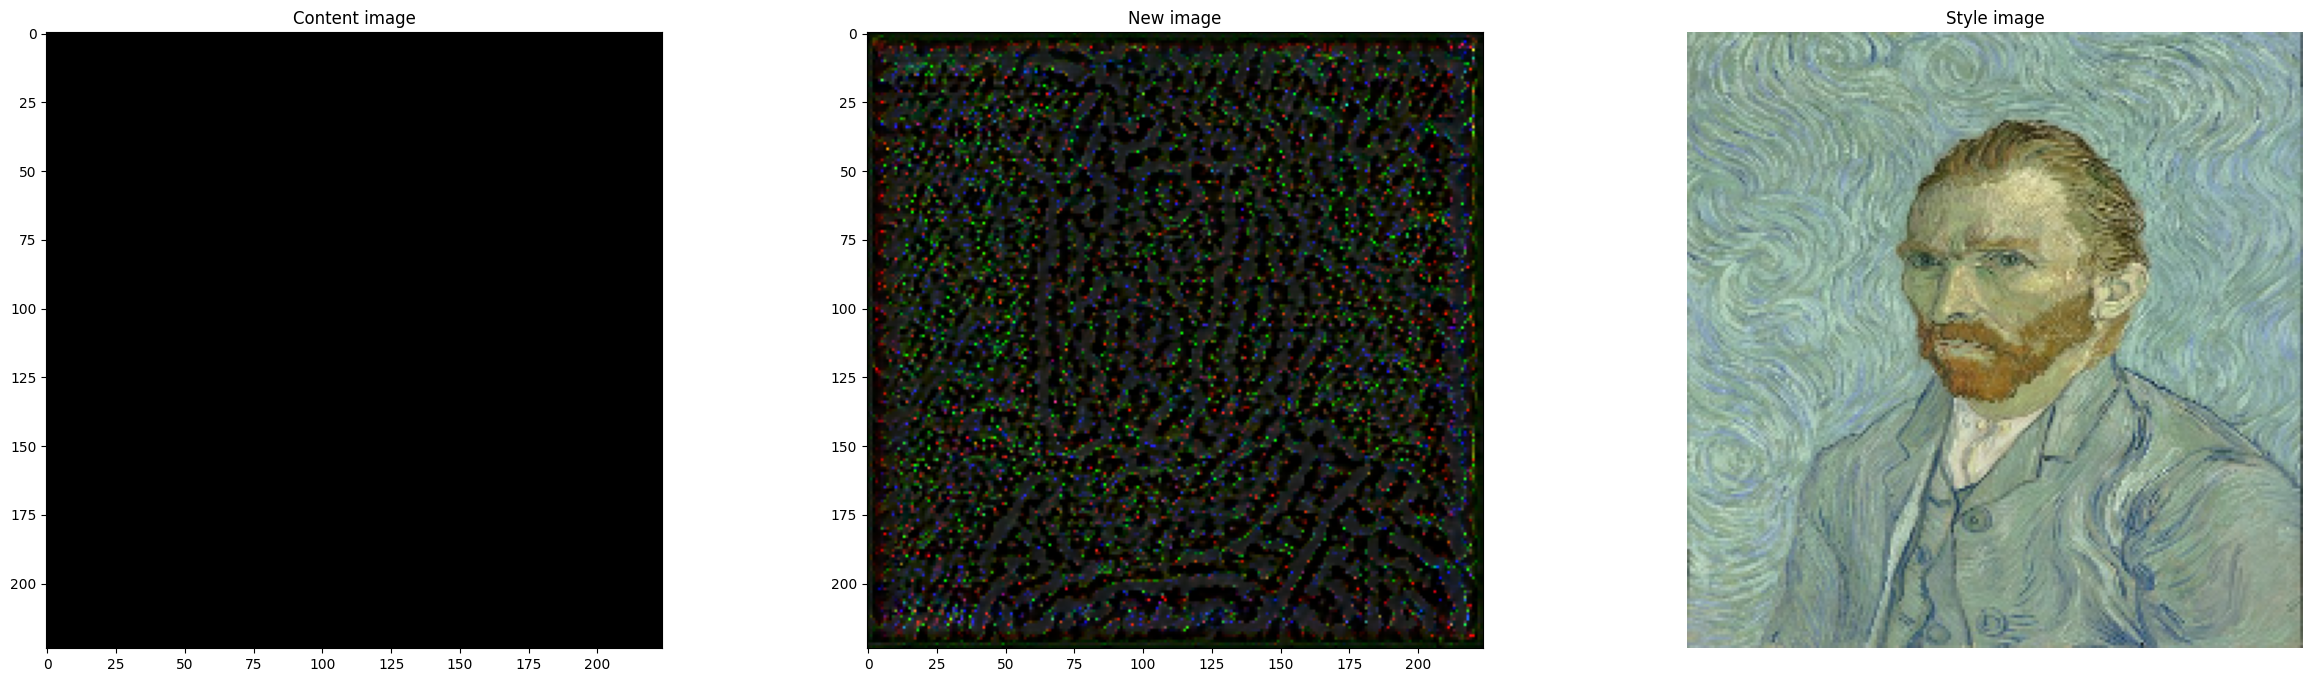

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,8))
ax1.imshow(tf.squeeze(content_image, axis = 0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image, axis = 0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(style_image, axis = 0))
ax3.set_title('Style image')
plt.axis('off')